# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [130]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [131]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Example 10: K-means clustering Exercise

### Overview

- [Importing libraries for data analysis and scaling](#importing-libraries-for-data-analysis-and-scaling)
- [Extracting the principal components step by step](#extracting-the-principal-components-step-by-step)
- [Using the elbow method to find the optimal number of clusters](#using-the-elbow-method-to-find-the-optimal-number-of-clusters)
- [Quantifying the quality of clustering via silhouette plots](#quantifying-the-quality-of-clustering-via-silhouette-plots)
- [Summary](#summary)

STATEMENT

In this exercise, you will perform an unsupervised analysis using the k-means method on the data set provided in the 'dataset1.csv' file.

To do this, you will use the scikit-learn library with the following instructions:

- Data normalization: Before applying k-means, make sure to normalize the data to improve the accuracy of the analysis.

- Estimation of the optimal number of clusters: Use the elbow method (elbow mwthod) to determine the optimal number of clusters.

- Calculation of clusters with k-means: Once the optimal number of clusters has been determined, apply the k-means algorithm to calculate the clusters.

- Graphical representation with PCA: Perform a PCA to reduce the dimensionality of the data and represent the clusters in a two-dimensional graph.

- Silhouette coefficient calculation: Calculates the silhouette coefficients for each group, as well as the global silhouette coefficient of the data set. Graphically represent these coefficients to evaluate the quality of the clusters formed.

In [132]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## Importing libraries for data analysis and scaling

In [133]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Extracting the principal components step by step

In [134]:
# Download the wine dataset from the UCI Machine Learning Repository
df = pd.read_csv('dataset1.csv')

In [135]:
# Show the first five rows of the dataset
df.head()

,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1,Target
0,20.8,0.733,48,9,22,120,72,56,0
1,32.0,0.444,42,1,29,100,66,196,0
2,34.8,0.217,24,1,45,112,80,132,0
3,31.0,0.874,21,0,16,113,80,0,0
4,26.2,0.313,41,6,30,80,66,0,0


In [136]:
# Show the shape of the dataset
df.shape

(768, 9)

In [137]:
# Splitting the dataset into features and target variable
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values # Target variable is the first column

## Using the elbow method to find the optimal number of clusters

In [138]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    
    km.fit(X)
    distortions.append(km.inertia_)


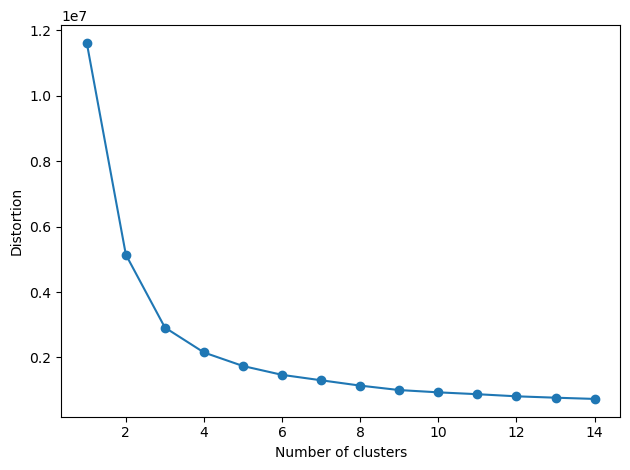

In [139]:
plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Quantifying the quality of clustering via silhouette plots

In [140]:
km = KMeans(n_clusters=5,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

In [141]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean')

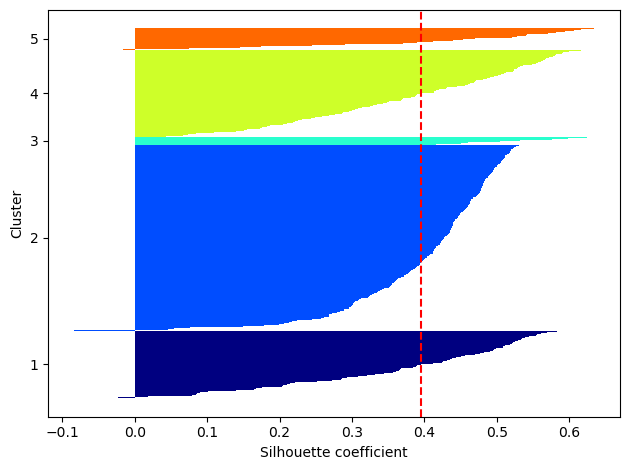

In [142]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

Comparison to "bad" clustering:

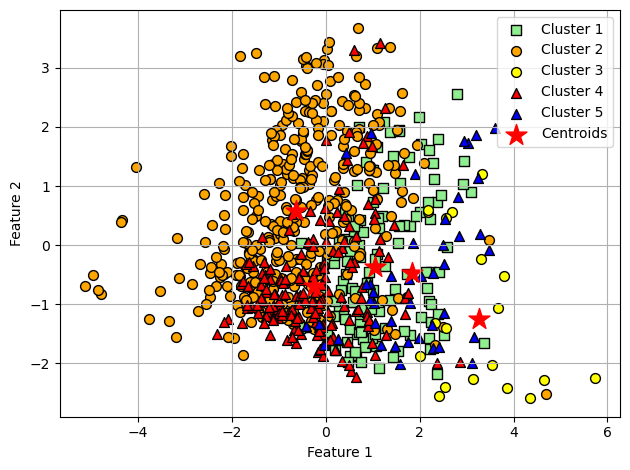

In [143]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
Cluster_std = sc.transform(km.cluster_centers_)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_std)
X_clusters = pca.transform(Cluster_std)

plt.scatter(X_pca[y_km == 0, 0],
            X_pca[y_km == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')

plt.scatter(X_pca[y_km == 1, 0],
            X_pca[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(X_pca[y_km == 2, 0],
            X_pca[y_km == 2, 1],
            s=50,
            c='yellow',
            edgecolor='black',
            marker='o',
            label='Cluster 3')

plt.scatter(X_pca[y_km == 3, 0],
            X_pca[y_km == 3, 1],
            s=50,
            c='red',
            edgecolor='black',
            marker='^',
            label='Cluster 4')

plt.scatter(X_pca[y_km == 4, 0],
            X_pca[y_km == 4, 1],
            s=50,
            c='blue',
            edgecolor='black',
            marker='^',
            label='Cluster 5')

plt.scatter(X_clusters[:, 0],
            X_clusters[:, 1],
            s=250,
            marker='*',
            c='red',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Summary

---

Readers may ignore the next cell.

In [144]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex10.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex10.ipynb.
# * --output ex10.py
# This option tells the script to save the output (the converted file) with the name
# ex10.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex10.ipynb --output ex10.py

[NbConvertApp] Converting notebook ex10.ipynb to script
[NbConvertApp] Writing 9884 bytes to ex10.py
